# K Means Clustering

### Importing Necessary Libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from math import sqrt
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.decomposition import PCA

### Importing data and removing non-numeric non-essential columns

- All null values are filled in as NaN
- Values such as ID and Jersey number do not have any statistical significance so they are excluded from the clustering.

In [3]:
football_data = pd.read_csv("../football_data.csv")
football_data.fillna(method ='ffill', inplace = True)
football_data = football_data.select_dtypes(include=np.number)
football_data = football_data.drop(['Unnamed: 0', 'ID', 'Jersey Number'], axis = 1)

### K means Clustering Algorithm

- The function takes two paramters, the data and the value `k` for the number of means.
- The clusters are allocated by randomly sampling `k` rows from the given data.
- When the clusters converge or number of iterations exceed 10, the function terminates.
- The Euclidean distance between each row and each mean is calculated, by squaring the distance between every column of the current row and current centroid. The centroid with the minimum distance is chosen as the cluster and the clusters array is updated.
- The new centroids are assigned by calculating the mean of every cluster. The new values are compared to previous cluster values. If there is no change, or if there have been more than 10 iterations, the clusters are returned. This is because with such large datasets, the differences between consecutive means can be small, but still not zero.
- The new centroids and cluster array is returned. Each row has a cluster assigned to it which will be used later in the scatterplot.

In [4]:
def kmeans (data, k) :
    cluster = np.zeros(data.shape[0])
    centroids = data.sample(n = k).values
    diff = 1
    iterations = 0
    while diff == 1:
        iterations += 1
        for index, row in data.iterrows():
            minDistance = float('inf')
            for c, centroid in enumerate(centroids):
                distance = 0
                for i in range(len(row)):
                    distance += (centroid[i] - row[i]) * (centroid[i] - row[i])
                distance = sqrt(distance)
                if distance < minDistance:
                    minDistance = distance
                    cluster[index] = c
        new_centroids = pd.DataFrame(data).groupby(by=cluster).mean().values
        if np.count_nonzero(centroids-new_centroids) == 0 or iterations == 10:
            diff = 0
        else:
            centroids = new_centroids
    return centroids, cluster



### Normalizing the data

Since the dataset is very large and cannot be visualized in a 2D graph (45 dimensions approximately), we use the sklearn.decomposition.pca function to flatten the data and reduce the number of dimensions to 2. This enables us to clearly visualize the data using arbitrarily defined dimensions as a result of linear dimensionality reduction.

In [5]:
# Scale and normalize data for easier processing
# scaler = StandardScaler()
# football_data = scaler.fit_transform(football_data)
# football_data = pd.DataFrame(normalize(football_data))

pca = PCA(n_components = 2)
data2d = pd.DataFrame(pca.fit_transform(football_data))
data2d.columns = ['D1', 'D2']

### K = 3

Here we call the K means algorithm for `k` = 3 with the original football_data variable and save the corresponding clusters and centroids. The centroids are also reduced to 2 dimensions so that they can be accurately represented on a graph.

In [68]:
centroids, clusters = kmeans(football_data, 3)

# centroids = scaler.fit_transform(centroids)
# centroids = pd.DataFrame(normalize(centroids))
centroids = pd.DataFrame(pca.fit_transform(centroids))
centroids.columns = ['D1', 'D2']

The scatterplot is plotted to show the clustering of the data on the basis of clusters assigned by the K means algorithm. The normalized axes are used in order to display the values of the reduced dimensions. The means are displayed in a different color to demonstrate how the clusters are created.

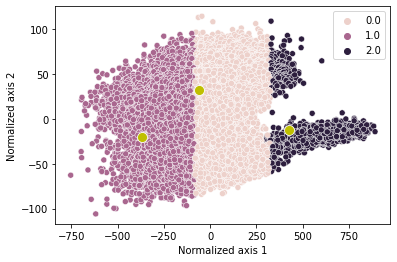

In [69]:
sns.scatterplot(x = data2d['D1'], y = data2d['D2'], hue=clusters)
sns.scatterplot(x = centroids['D1'], y = centroids['D2'], s = 100, color = 'y')
plt.xlabel("Normalized axis 1")
plt.ylabel("Normalized axis 2")
plt.show()

### K = 5

Here we call the K means algorithm for `k` = 5 with the original football_data variable and save the corresponding clusters and centroids. The centroids are also reduced to 2 dimensions so that they can be accurately represented on a graph.

In [70]:
centroids, clusters = kmeans(football_data, 5)

# centroids = scaler.fit_transform(centroids)
# centroids = pd.DataFrame(normalize(centroids))

centroids = pd.DataFrame(pca.fit_transform(centroids))
centroids.columns = ['D1', 'D2']

The scatterplot is plotted to show the clustering of the data on the basis of clusters assigned by the K means algorithm. The normalized axes are used in order to display the values of the reduced dimensions. The means are displayed in a different color to demonstrate how the clusters are created.

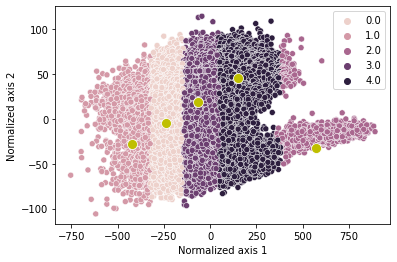

In [71]:
sns.scatterplot(x = data2d['D1'], y = data2d['D2'], hue=clusters)
sns.scatterplot(x = centroids['D1'], y = centroids['D2'], s=100, color = 'y')
plt.xlabel("Normalized axis 1")
plt.ylabel("Normalized axis 2")
plt.show()

### K = 7

Here we call the K means algorithm for `k` = 7 with the original football_data variable and save the corresponding clusters and centroids. The centroids are also reduced to 2 dimensions so that they can be accurately represented on a graph.

In [72]:
centroids, clusters = kmeans(football_data, 7)

# centroids = scaler.fit_transform(centroids)
# centroids = pd.DataFrame(normalize(centroids))

centroids = pd.DataFrame(pca.fit_transform(centroids))
centroids.columns = ['D1', 'D2']

The scatterplot is plotted to show the clustering of the data on the basis of clusters assigned by the K means algorithm. The normalized axes are used in order to display the values of the reduced dimensions. The means are displayed in a different color to demonstrate how the clusters are created.

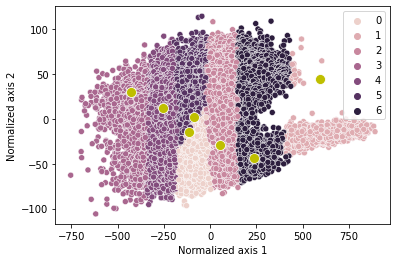

In [73]:
sns.scatterplot(x = data2d['D1'], y = data2d['D2'], hue=clusters)
sns.scatterplot(x = centroids['D1'], y = centroids['D2'], s=100, color = 'y')
plt.xlabel("Normalized axis 1")
plt.ylabel("Normalized axis 2")
plt.show()

### Elbow Method

Here we take values of `k` from `2` to `10` and find the WCSS (Within Cluster Sum of Squares) for each k value. This is done by finding the Euclidean distance between the centroid of the cluster and the current row. The total distances are stored in the total_distance variable, and are later used for plotting the graph.

In [88]:
total_distance = []
for k in range(2, 10) :
    centroids, clusters = kmeans(football_data, k)
    distance = 0
    for index, row in football_data.iterrows():
        for i in range(len(row)):
            distance += (centroids[int(clusters[index])][i] - row[i]) ** 2
    total_distance.append(sqrt(distance))    

Here we can see that the ideal number of clusters is 4 by using the Elbow method.

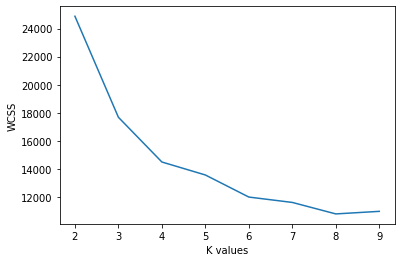

In [90]:
plt.xlabel("K values")
plt.ylabel("WCSS")
kvalues = [i for i in range(2, 10)]
plt.plot(kvalues, total_distance)

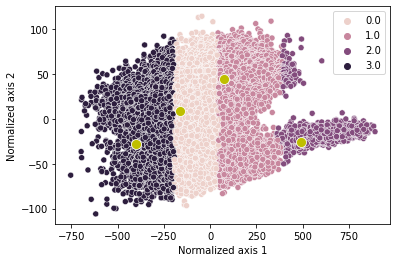

In [6]:
centroids, clusters = kmeans(football_data, 4)

# centroids = scaler.fit_transform(centroids)
# centroids = pd.DataFrame(normalize(centroids))
centroids = pd.DataFrame(pca.fit_transform(centroids))
centroids.columns = ['D1', 'D2']

sns.scatterplot(x = data2d['D1'], y = data2d['D2'], hue=clusters)
sns.scatterplot(x = centroids['D1'], y = centroids['D2'], s=100, color = 'y')
plt.xlabel("Normalized axis 1")
plt.ylabel("Normalized axis 2")
plt.show()